In [35]:
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [20]:
df = pd.read_csv('bhp.csv')

In [21]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [22]:
min_thresold , max_thresold = df.price_per_sqft.quantile([0.001,0.999])

In [23]:
min_thresold , max_thresold


(1366.184, 50959.36200000098)

In [24]:
df2 = df[(df.price_per_sqft>min_thresold) & (df.price_per_sqft<max_thresold)]

In [25]:
df2.shape

(13172, 7)

In [29]:
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit , max_limit

(-9900.429065502549, 23227.73653589429)

In [30]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]

In [31]:
df3.shape

(13047, 7)

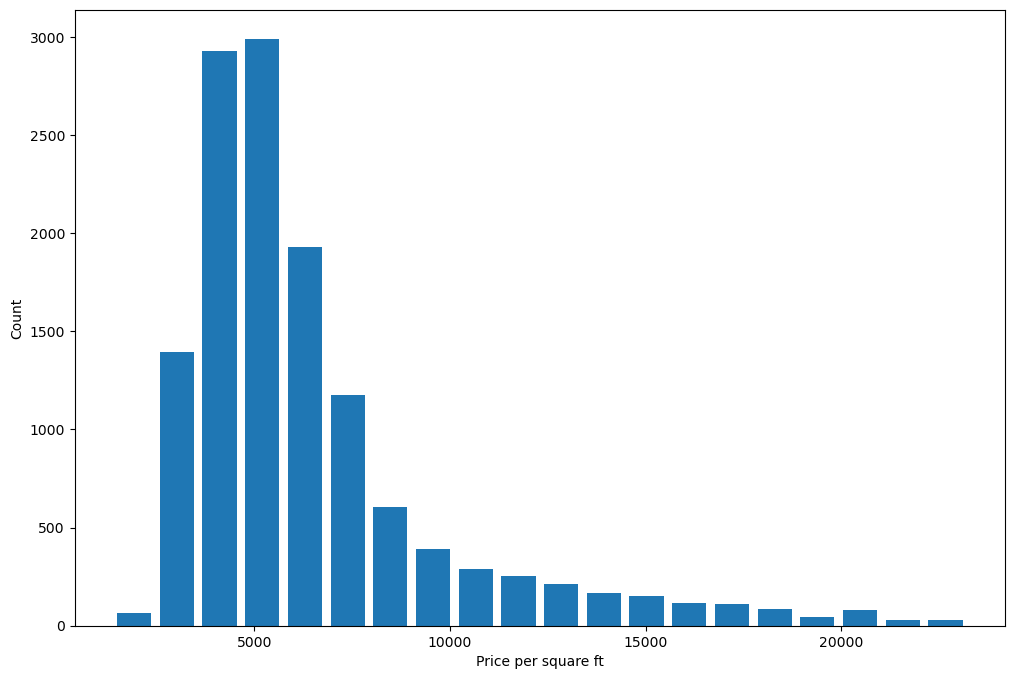

In [36]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

In [37]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()

/var/folders/f7/m5k2nrk12tn1btvsv3dj0_nr0000gn/T/ipykernel_77848/2602382665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()


In [38]:
df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
4084,other,2 BHK,1190.0,2.0,100.00,2,8403,0.420028
2190,Sarjapur Road,2 BHK,1215.0,2.0,110.00,2,9053,0.576995
2639,other,3 BHK,1370.0,2.0,75.00,3,5474,-0.287285
10761,Subramanyapura,2 BHK,929.0,1.0,51.00,2,5489,-0.283663
74,Kothannur,2 BHK,1206.0,2.0,48.23,2,3999,-0.643478
10443,Kadubeesanahalli,2 BHK,1185.0,2.0,55.00,2,4641,-0.488443
6870,Sarjapur Road,2 BHK,1115.0,2.0,43.00,2,3856,-0.678010
9088,Kothanur,3 BHK,1787.0,3.0,107.00,3,5987,-0.163403
4409,Sahakara Nagar,2 BHK,1048.0,2.0,50.00,2,4770,-0.457292
9134,other,2 Bedroom,1840.0,1.0,95.00,2,5163,-0.362387


In [39]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [40]:
df4 = df2[(df2.zscore > -4) & (df2.zscore<4)]

In [41]:
df4.shape

(13047, 8)